# Calculate dNdE spectra based on PPPC4DM Cirelli 

http://www.marcocirelli.net/PPPC4DMID.html

## Read in $\frac{dN}{dlog_{10}(x)}$ vs $dlog_{10}(x)$ spectra

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("AtProduction_gammas.dat",delim_whitespace=True)

In [3]:
data

,mDM,"Log[10,x]",eL,eR,e,\[Mu]L,\[Mu]R,\[Mu],\[Tau]L,\[Tau]R,...,Z,g,\[Gamma],h,\[Nu]e,\[Nu]\[Mu],\[Nu]\[Tau],V->e,V->\[Mu],V->\[Tau]
0,5,-8.90,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,-8.85,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,5,-8.80,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,5,-8.75,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,5,-8.70,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11093,100000,-0.20,0.120376,0.164452,0.142414,0.118679,0.162191,0.140435,0.250219,0.343664,...,0.017353,0.034521,0.006268,0.018649,0.036341,0.035359,0.062713,0.049568,0.007253,0.016084
11094,100000,-0.15,0.114321,0.156519,0.135420,0.112061,0.153479,0.132770,0.180252,0.247822,...,0.011076,0.020960,0.005056,0.014080,0.032615,0.031520,0.044223,0.037050,0.004981,0.006714
11095,100000,-0.10,0.108509,0.148947,0.128728,0.105200,0.144449,0.124824,0.129938,0.178762,...,0.006866,0.013063,0.041196,0.011203,0.028697,0.027460,0.031130,0.025530,0.003149,0.002627
11096,100000,-0.05,0.102214,0.140988,0.121601,0.097452,0.134443,0.115948,0.098153,0.135501,...,0.003653,0.008542,2.149326,0.009287,0.022050,0.020845,0.020311,0.015730,0.001788,0.000973


### Example for annihilation to Z and $m_{DM}=900\,GeV$

In [4]:
data[data['mDM']==900][['Log[10,x]','Z']]

,"Log[10,x]",Z
6981,-8.90,0.000037
6982,-8.85,0.000046
6983,-8.80,0.000057
6984,-8.75,0.000071
6985,-8.70,0.000088
...,...,...
7155,-0.20,0.015601
7156,-0.15,0.009103
7157,-0.10,0.004977
7158,-0.05,0.002441


In [5]:
z900 = data[data['mDM']==900][['Log[10,x]','Z']].to_numpy().T

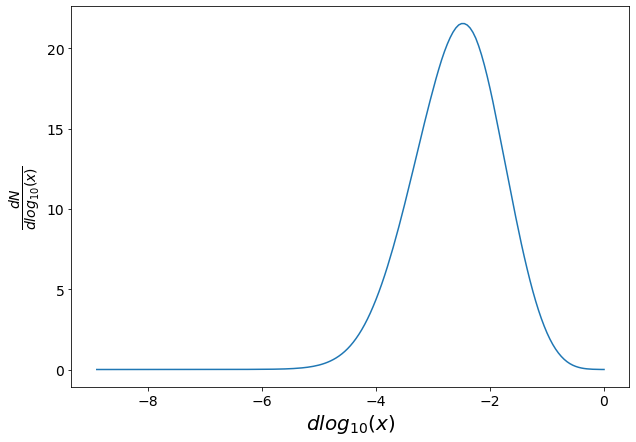

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.plot(z900[0],z900[1])
plt.xlabel(r'$dlog_{10}(x)$',fontsize=20)
plt.ylabel(r'$\frac{dN}{dlog_{10}(x)}$',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [7]:
log10x = z900[0]
dNdlog10x = z900[1]

## Get $\frac{dN}{log(x)dE}$ vs $log_{10}(E)$

\begin{align}
log_{10}(x) &= X = log_{10}(\frac{E}{m_{DM}}) \\
\Leftrightarrow 10^X &= \frac{E}{m_{DM}} \\
\Leftrightarrow log_{10}(E) &= log_{10}(10^X m_{DM})
\end{align} 

In [8]:
import numpy as np
logE = np.log10(10**log10x*900)

\begin{align}
\frac{dN}{dlog_{10}(x)} &= \frac{dN}{dlog_{10}(\frac{E}{m_{DM}})} \\
dlog_{10}(x) &= \frac{dlog(x)}{log(10)} \Leftrightarrow dlog(x) = dlog_{10}(x)log(10) \\
\frac{dN}{dE} &= \frac{\frac{dN}{dlog_{10}(x)}}{m_{DM}10^X log(10))} \\
&= \frac{dN}{dlog(x) m_{DM}10^X}\\
&= \frac{dN}{dlog(x) E}
\end{align}

In [9]:
dNdE = 1/(900*10**log10x*np.log(10))*dNdlog10x

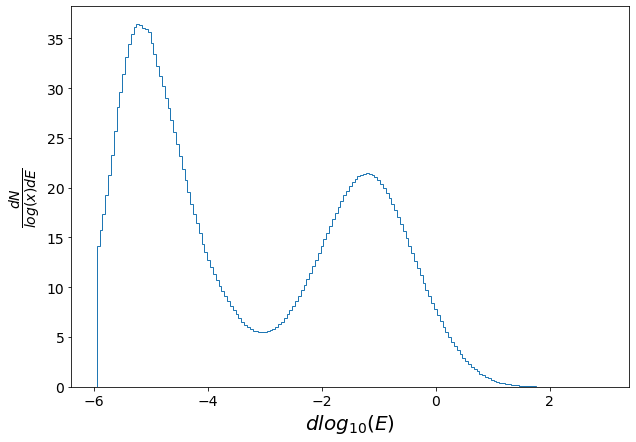

In [10]:
plt.figure(figsize=(10,7))
#plt.plot(logE,dNdE)
plt.hist(logE, bins=179,weights=dNdE,histtype='step')
plt.xlabel(r'$dlog_{10}(E)$',fontsize=20)
plt.ylabel(r'$\frac{dN}{log(x)dE}$',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('z900.pdf')
plt.show()

## Write root file

In [11]:
import ROOT

In [12]:
particle = 'ZZ'
mass = 900
hist = ROOT.TH1F("hdNdE",f"dN/dE for {particle}, m = {mass:.1f} GeV",len(logE)-1,logE)

In [13]:
for i in range(len(logE)):
    hist.SetBinContent(i+1,dNdE[i])

In [14]:
outFile = ROOT.TFile.Open(f'dNdESignal_{particle}_{mass:.1f}mass.root','RECREATE')
outFile.cd()
hist.Write()
outFile.Close()

# ALL Spectra

In [15]:
import pandas as pd
import numpy as np
data = pd.read_csv("AtProduction_gammas.dat",delim_whitespace=True)
data['log10E'] = np.log10(10**data['Log[10,x]']*900)

In [16]:
def dNdE(dNdlog10x,log10x,mass):
    return 1/(mass*10**log10x*np.log(10))*dNdlog10x

In [17]:
for column in data:
    skip = ['mDM', 'Log[10,x]','log10E']
    if column in skip:
        continue
    data[column] = np.vectorize(dNdE)(data[column],data['Log[10,x]'],data['mDM'])

In [18]:
import ROOT
log10E = np.unique(data['log10E'])
for mass in np.unique(data['mDM']):
    for column in data:
        skip = ['mDM', 'Log[10,x]','log10E']
        if column in skip:
            continue
        hist = ROOT.TH1F("hdNdE",f"dN/dE for {column}, m = {mass:.1f} GeV",len(log10E)-1,log10E)
        for i in range(len(log10E)):
            hist.SetBinContent(i+1,data[column][i])
        outFile = ROOT.TFile.Open(f'dNdESignal_{column}_{mass:.1f}mass.root','RECREATE')
        outFile.cd()
        hist.Write()
        outFile.Close()

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning:

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning:

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning:

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning:

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning:

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning:

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning:

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning:

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning:

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning:

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning:

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning:

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning:

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning:

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning:

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: hdNdE (Potential memory leak).
TROOT::Append:0: RuntimeWarning: